In [4]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [5]:
# Create a set of random latitute and longitude combinations.
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-180,180,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [9]:
import requests
from config import weather_api_key
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | tahta
Processing Record 2 of Set 12 | punta arenas
Processing Record 3 of Set 12 | esperance
Processing Record 4 of Set 12 | tiksi
Processing Record 5 of Set 12 | dawlatabad
Processing Record 6 of Set 12 | pevek
Processing Record 7 of Set 12 | kahului
Processing Record 8 of Set 12 | tasiilaq
Processing Record 9 of Set 12 | smithers
Processing Record 10 of Set 12 | sarkand
Processing Record 11 of Set 12 | ilulissat
Processing Record 12 of Set 12 | port elizabeth
Processing Record 13 of Set 12 | kozhva
Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | kavaratti
Processing Record 16 of Set 12 | kumluca
Processing Record 17 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 12 | manggar
Processing Record 19 of Set 12 | erenhot
Processing Record 20 of Set 12 | karamay
City not found. Skipping...
Processing Record 21 of Set 12 | bethel
Processing Recor

Processing Record 40 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 15 | xapuri
Processing Record 42 of Set 15 | karratha
Processing Record 43 of Set 15 | gigmoto
Processing Record 44 of Set 15 | mahebourg
Processing Record 45 of Set 15 | nome
Processing Record 46 of Set 15 | kruisfontein
Processing Record 47 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 48 of Set 15 | kununurra
Processing Record 49 of Set 15 | saldanha
Processing Record 50 of Set 15 | butaritari
Processing Record 1 of Set 16 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 16 | tarko-sale
Processing Record 3 of Set 16 | nhulunbuy
Processing Record 4 of Set 16 | kaa-khem
Processing Record 5 of Set 16 | port macquarie
Processing Record 6 of Set 16 | rocha
Processing Record 7 of Set 16 | cidreira
Processing Record 8 of Set 16 | pemba
Processing Record 9 of Set 16 | kieta
Processing Record 10 of Set 16 | leh
Processing Record 11 of Set 16 | bowen

Processing Record 22 of Set 19 | sitka
Processing Record 23 of Set 19 | port lincoln
Processing Record 24 of Set 19 | basco
Processing Record 25 of Set 19 | te anau
Processing Record 26 of Set 19 | gurgan
City not found. Skipping...
Processing Record 27 of Set 19 | sao felix do xingu
Processing Record 28 of Set 19 | kapfenberg
Processing Record 29 of Set 19 | yakeshi
Processing Record 30 of Set 19 | mogadishu
Processing Record 31 of Set 19 | antalya
Processing Record 32 of Set 19 | tunduru
City not found. Skipping...
Processing Record 33 of Set 19 | zaraza
Processing Record 34 of Set 19 | la palma
Processing Record 35 of Set 19 | wasilla
Processing Record 36 of Set 19 | lockport
Processing Record 37 of Set 19 | makakilo city
Processing Record 38 of Set 19 | manzhouli
Processing Record 39 of Set 19 | amurzet
Processing Record 40 of Set 19 | beloha
Processing Record 41 of Set 19 | el alto
Processing Record 42 of Set 19 | pizhanka
Processing Record 43 of Set 19 | nguiu
City not found. Ski

Processing Record 7 of Set 23 | soure
Processing Record 8 of Set 23 | dinsor
City not found. Skipping...
Processing Record 9 of Set 23 | nuuk
Processing Record 10 of Set 23 | sidi bin nur
Processing Record 11 of Set 23 | muborak
Processing Record 12 of Set 23 | lorengau
Processing Record 13 of Set 23 | dunedin
Processing Record 14 of Set 23 | waounde
Processing Record 15 of Set 23 | chulman
Processing Record 16 of Set 23 | port hedland
Processing Record 17 of Set 23 | gorontalo
Processing Record 18 of Set 23 | bonavista
Processing Record 19 of Set 23 | pitimbu
Processing Record 20 of Set 23 | hainichen
Processing Record 21 of Set 23 | ullapool
Processing Record 22 of Set 23 | taburi
City not found. Skipping...
Processing Record 23 of Set 23 | paragominas
Processing Record 24 of Set 23 | prince rupert
Processing Record 25 of Set 23 | chapais
Processing Record 26 of Set 23 | roma
Processing Record 27 of Set 23 | shelburne
Processing Record 28 of Set 23 | kokopo
Processing Record 29 of Se

In [11]:
print(len(city_data))
print(city_weather)

547
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 28.56, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1023, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 33.33, 'deg': 130, 'gust': 44.96}, 'clouds': {'all': 90}, 'dt': 1602700146, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1602663417, 'sunset': 1602699238}, 'timezone': 0, 'id': 3416888, 'name': 'Grindavik', 'cod': 200}


In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.41,57.70,71.60,88,20,5.82,MU,2020-10-12 20:42:37
1,Bethel,41.37,-73.41,53.60,71,90,17.22,US,2020-10-12 20:50:17
2,Albany,42.60,-73.97,55.99,55,97,7.45,US,2020-10-12 20:52:32
3,Ushuaia,-54.80,-68.30,44.60,70,75,5.82,AR,2020-10-12 20:52:32
4,Yulara,-25.24,130.99,62.60,29,0,5.82,AU,2020-10-12 20:42:40
5,Dingle,11.00,122.67,75.96,87,100,3.38,PH,2020-10-12 20:43:06
6,Bredasdorp,-34.53,20.04,59.00,82,37,14.99,ZA,2020-10-12 20:52:33
7,Hobart,-42.88,147.33,48.20,61,20,8.05,AU,2020-10-12 20:48:11
8,Beloha,-25.17,45.05,65.59,80,71,8.59,MG,2020-10-12 20:42:54
9,Almeirim,-1.52,-52.58,88.50,47,76,3.44,BR,2020-10-12 20:52:33


In [36]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2020-10-12 20:42:37,-20.41,57.70,71.60,88,20,5.82
1,Bethel,US,2020-10-12 20:50:17,41.37,-73.41,53.60,71,90,17.22
2,Albany,US,2020-10-12 20:52:32,42.60,-73.97,55.99,55,97,7.45
3,Ushuaia,AR,2020-10-12 20:52:32,-54.80,-68.30,44.60,70,75,5.82
4,Yulara,AU,2020-10-12 20:42:40,-25.24,130.99,62.60,29,0,5.82


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [38]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

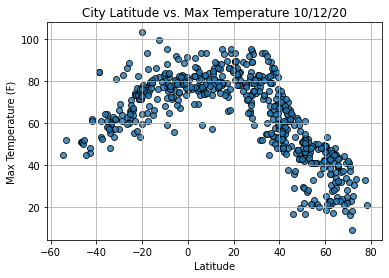

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

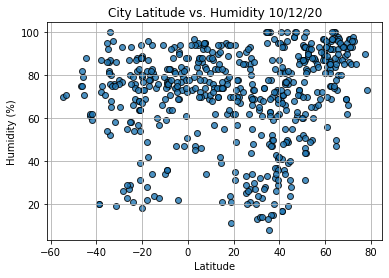

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

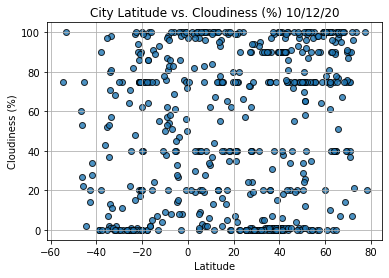

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

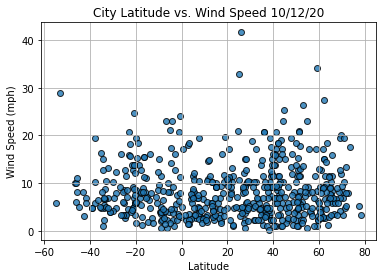

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [67]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [54]:
index13 = city_data_df.loc[13]
index13

City                       Aitape
Country                        PG
Date          2020-10-12 20:52:33
Lat                         -3.14
Lng                        142.35
Max Temp                    79.27
Humidity                       84
Cloudiness                    100
Wind Speed                   4.54
Name: 13, dtype: object

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bethel,US,2020-10-12 20:50:17,41.37,-73.41,53.60,71,90,17.22
2,Albany,US,2020-10-12 20:52:32,42.60,-73.97,55.99,55,97,7.45
5,Dingle,PH,2020-10-12 20:43:06,11.00,122.67,75.96,87,100,3.38
10,Ereymentau,KZ,2020-10-12 20:52:33,51.62,73.10,46.09,83,96,8.34
11,Clyde River,CA,2020-10-12 20:52:33,70.47,-68.59,32.00,97,90,6.93
...,...,...,...,...,...,...,...,...,...
558,Ozinki,RU,2020-10-12 20:53:37,51.18,49.68,50.68,44,58,11.48
560,Barguzin,RU,2020-10-12 20:53:37,53.62,109.62,21.56,92,35,3.60
561,Toora-Khem,RU,2020-10-12 20:53:37,52.47,96.11,27.99,90,100,1.66
562,Moose Factory,CA,2020-10-12 20:53:37,51.26,-80.61,60.80,31,1,20.80


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

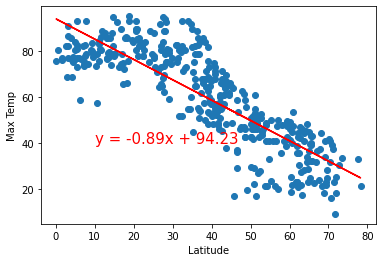

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

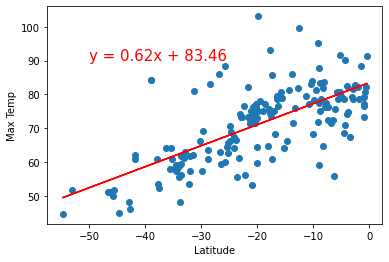

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

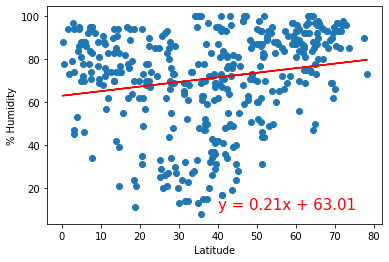

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

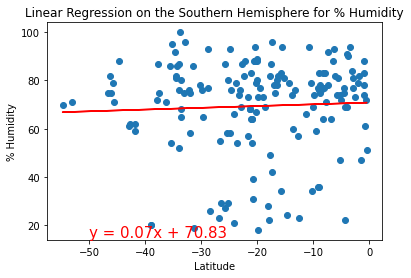

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

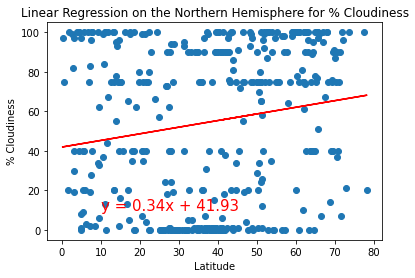

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,10))

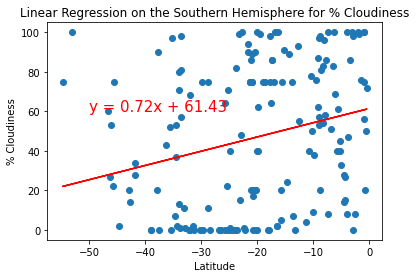

LinregressResult(slope=0.719871370772467, intercept=61.43212223111921, rvalue=0.2502632096986545, pvalue=0.0010686978465217105, stderr=0.21615186398222422)

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
stats.linregress(x_values,y_values)

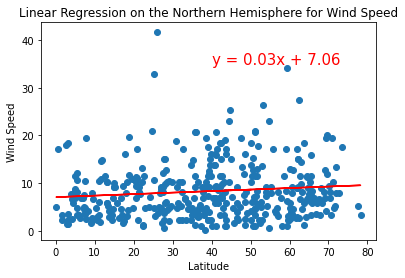

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 'Wind Speed',(40,35))

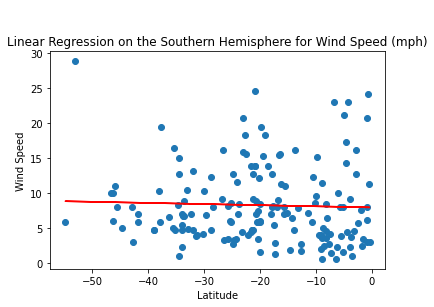

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Wind Speed',(-50,35))